<a href="https://colab.research.google.com/github/spirosChv/python-neuro-intro-imbizo2026/blob/main/intro_to_python_imbizo2026_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python using the Leaky Integrate-and-Fire model

### Spiros Chavlis

A *functional approach* to learning code. This course is **"Why-based"** rather than **"Fact-based"**. We will introduce Python concepts only when they are needed to solve a specific biological problem.

![Cape Town](https://images.unsplash.com/photo-1563656157432-67560011e209?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=900&h=300&q=80)

---
## Roadmap

In this tutorial, we will build a neuron simulation from scratch. We will learn Python concepts **strictly** as they become necessary to solve our problem.

Here is our plan:

1.  **The Goal:** Define the mathematical equation we want to solve.
2.  **Variables:** Define the biological constants (Time constant, Resting Potential, etc.).
3.  **Time:** Discretize time so the computer can process it.
4.  **The Loop:** Update the voltage step-by-step (The "Leaky Integrate" part).
5.  **The Decision:** Add the threshold to make the neuron spike (The "Fire" part).
6.  **Visualization:** Plot the results to see the neuron in action.

![Neural Network](https://images.unsplash.com/photo-1555949963-ff9fe0c870eb?ixlib=rb-1.2.1&auto=format&fit=crop&w=900&q=80)

## What is Python?

Python is one of the most popular programming languages in the world, especially in science, data analysis, and neuroscience. It is famous for being **readable**: writing Python code often feels like writing English sentences.


### Why is it called "Python"?

You might think it is named after the snake, but the origin is actually much funnier.

When **Guido van Rossum** began creating the language in the late 1980s, he was reading the published scripts from the British comedy troupe **Monty Python's Flying Circus**. He wanted a name that was short, unique, and slightly mysterious, so he chose "Python".

![what's in a name - monty python](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fm.media-amazon.com%2Fimages%2FM%2FMV5BOTFmYTc3ZWEtNTYxNi00OTA4LTk2NjEtNTI2MTJlNzkyMDdlXkEyXkFqcGdeQWpybA%40%40._V1_UX477_CR0%2C0%2C477%2C268_AL_.jpg&f=1&nofb=1)

While the logo is now two snakes, the spirit of the language is meant to be fun and accessible!

---

---
## 1. The Biological & Mathematical Model

Before we write a single line of code, we must understand the system we are simulating.

### The Neuron as an Electrical Circuit

In computational neuroscience, we often model the neuron's cell membrane using an electrical circuit analogy:

1.  **The Capacitor ($C_m$):** The cell membrane is a thin insulator separating the inside and outside of the cell. It can "hold" an electrical charge, just like a capacitor in a circuit.
2.  **The Resistor ($R_m$):** The membrane is not perfect; it has ion channels that allow charge to leak out. We model these channels as a resistor.
3.  **The Battery ($E_L$):** The neuron maintains a resting potential (usually around -70mV), acting like a battery.



### The Equation

When current ($I$) flows into this system, the voltage ($V$) across the membrane changes. This relationship is described by the **Leaky Integrate-and-Fire (LIF)** differential equation:

$$\tau_m \frac{dV}{dt} = -(V - E_L) + R_m I(t)$$

Where:
* $\tau_m$: The **Membrane Time Constant**. How fast the neuron reacts to input.
* $V$: The **Membrane Potential**. The voltage we want to calculate.
* $E_L$: The **Resting Potential**. The voltage where the neuron sits when idle.
* $R_m$: The **Membrane Resistance**. How hard it is to change the voltage.
* $I(t)$: The **Input Current**. The stimulus we apply.

**Our Goal:** Use Python to solve this equation and track $V$ over time.

---
## 2. Defining Variables

In the equation above, we have symbols like $\tau_m$ and $E_L$. These are just letters on a page. For the computer to understand them, we must define them as **Variables**.

### What is a Variable?
Think of a variable as a labeled box where you store information.
* **The Name:** The label on the box (e.g., `tau`).
* **The Value:** What is inside the box (e.g., `20.0`).

### The Assignment Operator (`=`)
In math, $=$ means "these two things are equal."
In Python, `=` means **"Assign the value on the right to the variable on the left."**

> **Note on Comments:** Any text following a hash symbol (`#`) is a "comment." Python ignores it. We use comments to write notes for humans (like defining units).


In [12]:
# =============================================================================
# Defining Model Parameters
# =============================================================================

# Membrane Time Constant (tau_m)
# Unit: milliseconds (ms)
tau = 20.0

# Resting Potential (E_L)
# Unit: millivolts (mV)
E_L = -70.0

# Membrane Resistance (R_m)
# Unit: MegaOhms (MOhms)
R = 10.0

# Input Current (I)
# Unit: nanoAmperes (nA)
I = 10

# Threshold Potential (V_th)
# If the voltage crosses this, the neuron fires.
V_th = -50.0

# Reset Potential (V_reset)
# After firing, the voltage returns here.
V_reset = -75.0

# Let's verify our variables by printing them
print("Parameters defined successfully.")
print("The Resting Potential is:", E_L, "mV")

Parameters defined successfully.
The Resting Potential is: -70.0 mV


---
## 3. Discretizing Time (The Euler Method)

Our equation contains a derivative $\frac{dV}{dt}$. This represents a **continuous** change in time. However, computers act in **discrete** steps. They cannot calculate "instantaneous" change; they can only calculate "step-by-step" change.

To solve this, we use the **Euler Method**.

### The Logic
Instead of solving the whole curve at once, we chop time into tiny steps of size $\Delta t$ (or `dt`).
1.  We look at the voltage *now*: $V(t)$.
2.  We calculate the slope (how fast it's changing): $\frac{dV}{dt}$.
3.  We predict the voltage at the *next* step: $V(t + \Delta t)$.

[Image of Euler method visualization numerical integration]

### The Update Rule
We calculate the new voltage using this simple formula:

$$V_{new} = V_{old} + \text{Change}$$
$$V(t+\Delta t) = V(t) + \frac{dV}{dt} \cdot \Delta t$$

If our time step `dt` is small enough, this approximation is very accurate.

In [13]:
# =============================================================================
# Setting up Time
# =============================================================================

# Time step (dt) in milliseconds
# Smaller dt = more accurate, but slower simulation
dt = 0.1

# Total duration of the simulation (T) in milliseconds
T = 100.0

# Calculate the total number of steps we need to take
# Formula: Total Time / Step Size
num_steps = T / dt

print("Total simulation time:", T, "ms")
print("Time step size:", dt, "ms")
print("Total number of steps:", num_steps)
print("Type of num_steps:", type(num_steps))

Total simulation time: 100.0 ms
Time step size: 0.1 ms
Total number of steps: 1000.0
Type of num_steps: <class 'float'>


---
## 4. The Simulation Loop

Now we perform the actual simulation. We need to instruct the computer to repeat our calculation 1,000 times (once for each time step).

### Python Concepts Needed:
1.  **Lists (`[]`):** A variable that can hold multiple items. We need this to store the history of our voltage so we can plot it later.
2.  **Integer Conversion (`int()`):** Loops need whole numbers. `1000.0` is a decimal (float), so we must force it to be `1000` (integer).
3.  **For Loops:** The command `for step in range(num_steps):` tells Python to repeat the indented code block `num_steps` times.



[Image of programming loop flowchart]


### The Strategy
1.  Start voltage $V$ at the resting potential.
2.  Create a list called `V_trace` and put the starting $V$ inside.
3.  Loop through time:
    * Calculate the change in voltage ($\frac{dV}{dt}$).
    * Update $V$ (add the change).
    * **Append** the new $V$ to our `V_trace` list.

In [14]:
# =============================================================================
# Running the Simulation
# =============================================================================

# 1. Initialize Voltage
V = E_L

# 2. Create a list to store the voltage history
# We start with the initial value inside the list
V_trace = [V]

# 3. Fix the step count type
# range() requires an integer, but our calculation gave a float (1000.0)
num_steps = int(num_steps)

# 4. The Loop
# "For every step i from 0 up to num_steps..."
for i in range(num_steps):

    # Calculate the derivative (Slope of V)
    # Equation: tau * dV/dt = -(V - E_L) + R*I
    # So:       dV/dt = ( -(V - E_L) + R*I ) / tau
    dv_dt = ( -(V - E_L) + R * I ) / tau

    # Update V (Euler method)
    # V_new = V_old + Change_Rate * Time_Step
    V = V + dv_dt * dt

    # Store the result
    V_trace.append(V)

print("Simulation complete.")
print("Final Voltage:", V, "mV")
print("Length of voltage trace:", len(V_trace))

Simulation complete.
Final Voltage: 29.334603142116787 mV
Length of voltage trace: 1001


---
## 5. Visualization

We have calculated the voltage at every step, but looking at a list of thousands of numbers is not very helpful. We need to visualize the data.

### Introducing Matplotlib
Python has a powerful library for plotting called **Matplotlib**.
* We usually import it as `plt` to save typing.
* The command `plt.plot()` acts like drawing a line on a graph.


Let's plot our voltage history.

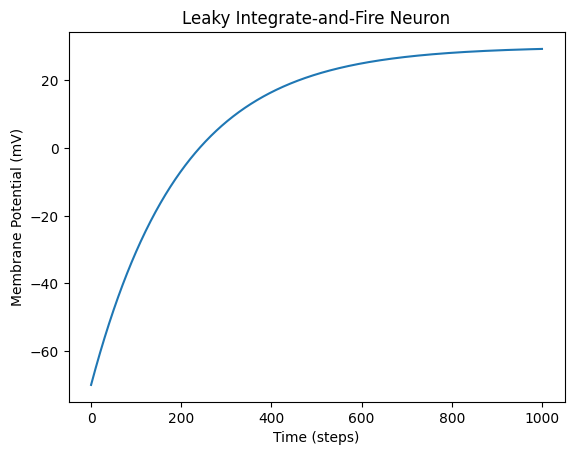

In [15]:
# =============================================================================
# Plotting the Results
# =============================================================================

import matplotlib.pyplot as plt

# plot(y_data) treats the list index as the X-axis (0, 1, 2...)
plt.plot(V_trace)

# Always label your axes!
plt.title('Leaky Integrate-and-Fire Neuron')
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (steps)')

# Display the plot
plt.show()

---
## 6. Making it Fire (The "If" Statement)

In our previous plot, the voltage rose and stayed high. But a real neuron **spikes**!

When the membrane potential reaches a specific **Threshold ($V_{th}$)**, two things happen:
1.  The neuron fires an action potential (a spike).
2.  The voltage immediately drops to the **Reset Potential ($V_{reset}$)**.

### The Logic: If / Else
To code this, we need the computer to make a decision during every single time step.

[Image of if else statement flowchart]

We use an `if` statement:
> **IF** voltage is greater than threshold:
> $\rightarrow$ **THEN** set voltage to reset value.

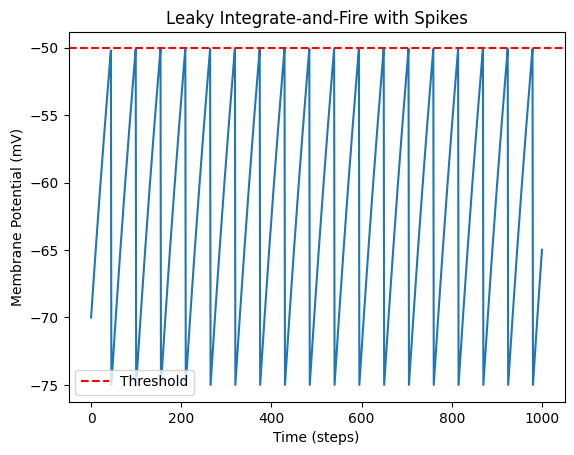

In [16]:
# =============================================================================
# Running the Simulation (With Firing)
# =============================================================================

# Reset the voltage to resting potential
V = E_L

# Clear the history list
V_trace = [V]

# The Loop
for i in range(num_steps):

    # 1. Calculate the change (Leaky Integrate)
    dv_dt = ( -(V - E_L) + R * I ) / tau
    V = V + dv_dt * dt

    # 2. Check for Spike (Fire)
    if V >= V_th:
        # If we crossed the threshold, reset the voltage
        V = V_reset
        # (Optional: You could count spikes here!)

    # 3. Store the result
    V_trace.append(V)

# Plot the new result
plt.plot(V_trace)
plt.title('Leaky Integrate-and-Fire with Spikes')
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (steps)')
plt.axhline(y=V_th, color='r', linestyle='--', label='Threshold') # Draw a red line for threshold
plt.legend()
plt.show()

---
## 7. Conclusion & Exercises

Congratulations! You have just simulated a biological neuron using Python.

We have moved from a biological concept to a working simulation by learning:
* **Variables:** Storing physical constants like `tau` and `R`.
* **Math:** Using `+`, `-`, `*`, `/` to calculate change.
* **Loops:** Repeating instructions using `for`.
* **Conditionals:** Making decisions with `if` to handle thresholds.
* **Plotting:** Visualizing the data.

### **Exercises**

The best way to learn is to experiment. Go back to the code above, change the values, and see what happens!

**1. The Rheobase (Minimum Current):**
Change the Input Current (`I`) to `1.0` nA.
* Does the neuron still fire?
* Why not? (Hint: Look at the equation $V_{steady} = E_L + R \cdot I$. Is this value higher than $V_{th}$?)

**2. Frequency-Current (F-I) Curve:**
Increase the Input Current (`I`) to `5.0` nA.
* What happens to the number of spikes?
* Does the neuron fire faster or slower?

**3. The Time Constant:**
Change `tau` from `20.0` to `5.0`.
* Does the neuron reach the threshold faster or slower?

In [17]:
# =============================================================================
# EXERCISE PLAYGROUND
# =============================================================================

# 1. Change parameters here
I_exercise = 1.0   # Try changing this to 1.0, 5.0, or 10.0
tau_exercise = 20.0

# 2. Re-run the simulation logic below
# (Copy and paste your loop code here to test different values)

print("Run this cell after pasting your code to see the changes!")

Run this cell after pasting your code to see the changes!
